In [60]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import re

In [61]:
x_train_df = pd.read_csv("input_training.csv", index_col="ID")
y_train_df = pd.read_csv("output_training_gmEd6Zt.csv", index_col="ID")
x_test_df = pd.read_csv("input_test.csv", index_col="ID")

x_train_df.dropna(inplace = True)

In [62]:
x_train_df

,day,equity,r0,r1,r2,r3,r4,r5,r6,r7,...,r43,r44,r45,r46,r47,r48,r49,r50,r51,r52
ID,,,,,,,,,,,,,,,,,,,,,
1,272,107,-9.76,0.00,-12.21,46.44,34.08,0.00,41.24,12.08,...,-4.83,-16.92,-4.84,4.84,0.00,7.26,-9.68,-19.38,9.71,26.68
2,323,1063,49.85,0.00,0.00,-26.64,-23.66,-22.14,49.12,53.61,...,-6.37,1.59,6.37,-49.32,-9.59,-6.40,22.41,-6.39,7.99,15.96
4,123,1465,-123.84,-115.18,-26.44,0.00,42.42,10.56,0.00,-47.57,...,-5.36,-21.44,-21.48,10.78,-21.55,-5.40,-10.81,5.41,-32.47,43.43
5,343,1279,-26.91,4.76,9.52,-5.55,-7.14,-1.59,-7.14,-0.79,...,-0.80,0.80,-3.19,3.99,-3.19,-4.79,-5.59,6.39,-6.38,-5.59
6,212,185,0.00,-30.67,4.40,-13.19,13.20,26.37,4.38,4.38,...,-4.41,0.00,6.62,13.23,0.00,0.00,4.40,13.20,-4.40,4.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843294,297,123,3.96,0.00,-70.34,74.24,-0.56,0.00,-23.63,-9.57,...,-10.80,1.71,0.00,-3.98,2.28,-21.62,-1.71,9.12,0.00,9.11
843295,16,1501,0.00,-183.49,-13.19,46.24,0.00,-39.60,13.25,0.00,...,0.00,6.62,0.00,19.85,0.00,-26.42,6.62,0.00,0.00,-19.88
843296,166,1231,37.02,2.93,-3.67,16.89,-4.03,13.56,-4.39,-14.28,...,2.92,-3.28,-1.46,-3.65,-1.10,-13.51,2.92,-6.21,9.69,-3.66


In [58]:
x_test_df

,day,equity,r0,r1,r2,r3,r4,r5,r6,r7,...,r43,r44,r45,r46,r47,r48,r49,r50,r51,r52
ID,,,,,,,,,,,,,,,,,,,,,
1000000,1000384,1000064,79.19,-26.37,-167.18,103.46,-102.27,-198.02,13.77,-59.61,...,-116.69,29.82,-29.69,77.57,23.75,82.94,-17.63,17.60,5.87,0.00
1000001,1000148,1000841,-321.77,-178.53,107.97,27.29,-64.54,-73.78,9.93,-26.50,...,-12.21,1.53,32.08,-33.50,-21.41,43.89,68.07,-23.20,-13.14,-82.95
1000002,1000441,1000380,-51.95,-19.58,-26.16,-26.28,-3.29,3.29,-46.11,16.55,...,13.56,-10.16,-40.68,13.61,3.40,6.80,10.20,0.00,-10.19,-6.80
1000003,1000059,1001843,-169.49,9.57,-76.48,28.90,0.00,-19.21,105.87,-9.52,...,-9.72,-9.72,-9.73,-9.74,29.24,-29.18,34.15,14.58,-29.13,4.87
1000004,1000336,1001783,-46.19,32.17,-3.08,-32.06,11.75,27.81,-13.55,-30.21,...,-3.68,-1.84,-1.23,1.23,5.53,-7.37,1.84,1.23,0.61,-4.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1885794,1000125,1001131,0.00,67.87,-67.41,-18.15,12.99,-42.80,29.96,35.06,...,-1.27,5.09,-12.73,5.10,-8.91,-20.41,2.56,0.00,-7.67,6.40
1885795,1000314,1000333,76.29,-65.02,2.73,-24.54,-17.78,13.70,-19.17,24.70,...,1.36,-1.36,-13.65,0.00,0.00,-4.10,-2.73,10.94,10.93,8.18
1885796,1000247,1000348,-73.66,37.11,-7.92,-7.93,0.00,-18.49,-26.46,13.27,...,-7.97,10.63,5.31,-10.61,0.00,13.28,-5.31,6.64,7.96,5.30


# Cleaning Data
1 - Dealing with NaNs

In [6]:
x_train_df.dropna(inplace=True)

2 - Plot data

In [7]:
train_df = x_train_df.join(y_train_df).copy(deep=True)
r_filter = re.compile("r[0-9]+")
train_df["total_r0-52"] = list(map(
    composed_bps_returns,
    train_df[list(filter(r_filter.match, train_df.columns))].to_numpy()
    ))

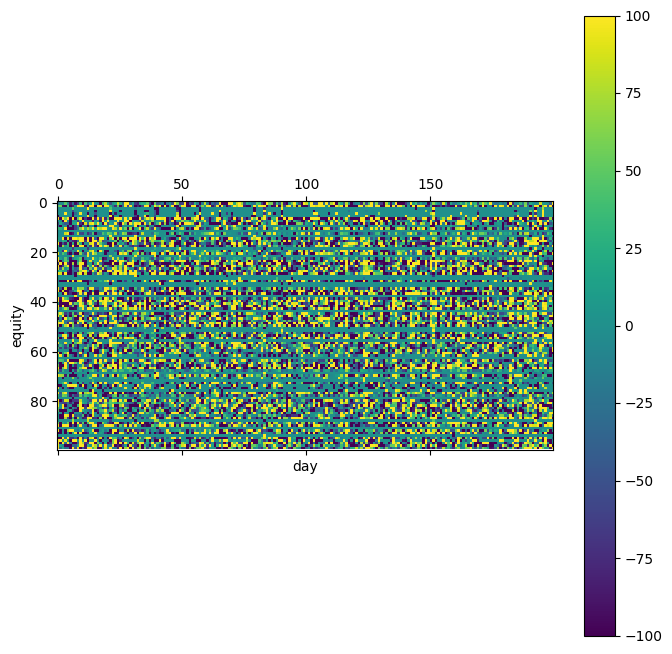

In [8]:
plot_matrix(train_df, "day", "equity", "total_r0-52", lambda x : list(x)[0], y_lim= 200)

# Add features
1 - Time features (day of the week)

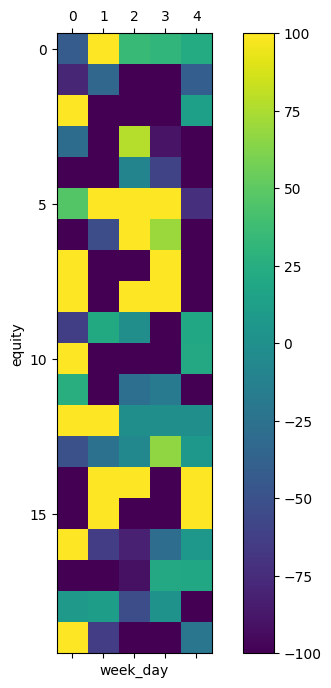

In [9]:
train_df["week_day"] = train_df["day"].apply(lambda x : x % 5)
plot_matrix(train_df,"week_day", "equity", "total_r0-52", lambda x : list(x)[0], x_lim=20)

# Preprocess

In [28]:
from sklearn.preprocessing import robust_scale, power_transform, quantile_transform
features_columns = list(filter(r_filter.match, train_df.columns)) # + ["week_day", "total_r0-52"]
preprocessed_features_columns = [f"preprocessed_{col}" for col in features_columns]

train_df[preprocessed_features_columns] = quantile_transform(train_df[features_columns].to_numpy(), output_distribution='normal')

In [29]:
train_df[preprocessed_features_columns].describe(percentiles=[0.01, 0.1, 0.2, 0.5, 0.8, 0.9, 0.99])

,preprocessed_r0,preprocessed_r1,preprocessed_r2,preprocessed_r3,preprocessed_r4,preprocessed_r5,preprocessed_r6,preprocessed_r7,preprocessed_r8,preprocessed_r9,...,preprocessed_r43,preprocessed_r44,preprocessed_r45,preprocessed_r46,preprocessed_r47,preprocessed_r48,preprocessed_r49,preprocessed_r50,preprocessed_r51,preprocessed_r52
count,600936.000000,600936.000000,600936.000000,600936.000000,600936.000000,600936.000000,600936.000000,600936.000000,600936.000000,600936.000000,...,600936.000000,600936.000000,600936.000000,600936.000000,600936.000000,600936.000000,600936.000000,600936.000000,600936.000000,600936.000000
mean,0.001622,-0.000274,-0.005295,0.004014,0.008534,0.003803,-0.000852,0.004112,-0.004459,0.003431,...,-0.003404,-0.004411,0.000108,0.003038,0.002378,-0.001239,-0.005442,0.000619,-0.002393,0.000868
std,1.001624,0.998147,0.996071,0.997524,0.997345,0.998796,0.995199,0.999352,0.996814,1.001405,...,0.995486,0.995859,0.994772,0.994611,0.994164,0.995969,0.994234,0.994633,0.994967,0.996518
min,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
1%,-2.335596,-2.338509,-2.332201,-2.320073,-2.329219,-2.354906,-2.334795,-2.328443,-2.337540,-2.314034,...,-2.315634,-2.333797,-2.313045,-2.309770,-2.326577,-2.323835,-2.331814,-2.314880,-2.329631,-2.339375
10%,-1.287140,-1.283831,-1.284065,-1.275302,-1.268862,-1.282204,-1.274173,-1.278137,-1.285877,-1.284156,...,-1.284907,-1.285201,-1.276057,-1.276847,-1.277191,-1.283265,-1.288793,-1.281495,-1.279842,-1.280543
20%,-0.841044,-0.841964,-0.846398,-0.842006,-0.834104,-0.838408,-0.838764,-0.841353,-0.846079,-0.838675,...,-0.842337,-0.843052,-0.842098,-0.837338,-0.840906,-0.843888,-0.842337,-0.843888,-0.843052,-0.838051
50%,0.030114,-0.005018,0.006273,0.040157,0.006273,-0.010037,0.000000,0.042668,0.035135,-0.026349,...,0.010037,0.001255,0.012546,0.005018,0.028859,-0.010037,-0.028859,-0.006273,-0.015055,0.008782
80%,0.848744,0.846521,0.833532,0.842950,0.852536,0.847715,0.834054,0.849448,0.832716,0.849616,...,0.837338,0.839898,0.836151,0.840192,0.843589,0.837932,0.833781,0.843291,0.839716,0.841621
90%,1.286963,1.285109,1.276762,1.282072,1.291694,1.287021,1.274595,1.289413,1.277191,1.292144,...,1.279842,1.275817,1.284617,1.285659,1.283576,1.280981,1.276847,1.283057,1.273889,1.278674


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(train_df[preprocessed_features_columns], train_df["reod"]+1, test_size=0.33, shuffle = False)


In [56]:
X_train = X_train.to_numpy()[:, :, np.newaxis]
X_validation = X_validation.to_numpy()[:, :, np.newaxis]


# Model

In [57]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, return_sequences = True, dropout= 0.3),
    tf.keras.layers.LSTM(64, return_sequences = True, dropout= 0.3),
    tf.keras.layers.LSTM(64, return_sequences = False, dropout= 0.3),
    tf.keras.layers.Dense(3, activation = "softmax")
])
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer= "adam",
    metrics = ["acc"]
)
model.fit(
    X_train, y_train,
    validation_data=(X_validation, y_validation),
    batch_size= 64,
    epochs = 20
)

Epoch 1/20
1312/6292 [=====>........................] - ETA: 11:34 - loss: 1.0634 - acc: 0.4171

KeyboardInterrupt: 

# NE PAS OUBLIER DE TRAITER LE CAS DES NANS DANS LES DONNES DE TEST (faire un autre model par exemple)